In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import keras
from keras.layers import BatchNormalization, Conv2D, SeparableConv2D, Activation, Dropout, MaxPool2D, Add, Dense
from tensorflow.keras.applications import Xception
import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
inp = keras.Input(shape=(224, 224, 3))
m = (Conv2D(64, (3, 3), padding='same', activation='relu'))(inp)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
mod = (Conv2D(128, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(512, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(512, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (Dropout(0.2))(m)
m = (keras.layers.GlobalMaxPooling2D())(m)
m = (Dense(2, activation='softmax'))(m)
model = keras.Model(inp, m)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd


from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer=Adadelta(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/glaucoma.csv")
glaucoma = np.array(data)
glaucoma[1][4]

IndexError: ignored

In [ ]:
x = []
y = []

choicelist = list(range(0, len(glaucoma)))

for i in range(len(glaucoma)):
  ind = np.random.choice(choicelist)
  filename = str(glaucoma[ind][0])

  filepath = "/content/gdrive/My Drive/Cropped_true_v1.0"

  img = np.array(Image.open(os.path.join(filepath, filename)).resize((224, 224), Image.ANTIALIAS)).reshape(224, 224, 3)
  img = img/255.0

  x.append(img)
  y.append(glaucoma[ind][4])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=1)

x_t, x_v, y_t, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=1)

In [ ]:
imgen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True, rotation_range=20)
imgen.fit(x_t)


In [ ]:
batchsize = 16
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=90, horizontal_flip= True, vertical_flip= True,validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'/content/gdrive/MyDrive/ORIGA_Organized-2/Train',
                                target_size=(224,224),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'/content/gdrive/MyDrive/ORIGA_Organized-2/Train',
                                target_size=(224,224),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 644 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'/content/gdrive/MyDrive/ORIGA_Organized-2/Test',
                                target_size=(224,224),batch_size=batchsize,class_mode='categorical', shuffle=False)

Found 204 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint(r'/content/gdrive/MyDrive/checkpoints/GC-Net-v1.1.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=11, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=5, verbose=3)

callbacks=[checkpoint, learning_rate]

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

history = model.fit_generator(train_data, epochs=35, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize, callbacks= callbacks, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/35
40/40 [==============================] - ETA: 0s - loss: 0.7076 - acc: 0.6274 
Epoch 1: val_loss improved from inf to 0.56204, saving model to /content/gdrive/MyDrive/checkpoints/GC-Net-v1.2.h5
40/40 [==============================] - 607s 15s/step - loss: 0.7076 - acc: 0.6274 - val_loss: 0.5620 - val_acc: 0.7063 - lr: 1.0000e-04
Epoch 2/35
40/40 [==============================] - ETA: 0s - loss: 0.6757 - acc: 0.6401 
Epoch 2: val_loss improved from 0.56204 to 0.52871, saving model to /content/gdrive/MyDrive/checkpoints/GC-Net-v1.2.h5
40/40 [==============================] - 585s 15s/step - loss: 0.6757 - acc: 0.6401 - val_loss: 0.5287 - val_acc: 0.7500 - lr: 1.0000e-04
Epoch 3/35
40/40 [==============================] - ETA: 0s - loss: 0.6166 - acc: 0.6799 
Epoch 3: val_loss did not improve from 0.52871
40/40 [==============================] - 584s 15s/step - loss: 0.6166 - acc: 0.6799 - val_loss: 0.6023 - val_acc: 0.7063 - lr: 1.0000e-04
Epoch 4/35
40/40 [=================

In [ ]:
loss, acc = model.evaluate(test_data)

9/9 [==============================] - 27s 3s/step - loss: 0.6268 - acc: 0.6692


In [ ]:
model = tf.keras.models.load_model("/content/gdrive/MyDrive/checkpoints/GC-Net-v1.2.h5")

In [ ]:
loss, acc = model.evaluate(test_data)

13/13 [==============================] - 36s 3s/step - loss: 0.8067 - acc: 0.6225


In [ ]:
print(loss, acc)

0.3977862000465393 0.8187500238418579


Accuracy:  0.45625
Confusion Matrix
[[32 48]
 [39 41]]


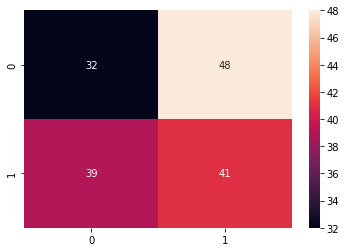

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(validation_data)
y_pred = np.argmax(Y_pred, axis=1)
score_test = metrics.accuracy_score(validation_data.classes, y_pred)
print("Accuracy: ", score_test)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))
import seaborn as sb
conf_matrix = confusion_matrix(validation_data.classes, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='.5g')

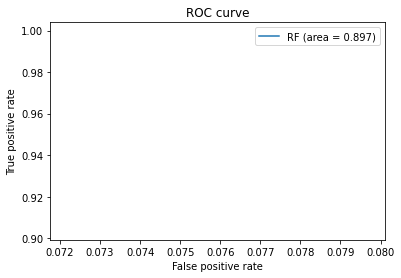

In [ ]:
plt.plot(0.07594, 0.9516, label='RF (area = {:.3f})'.format(0.897))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

